<a href="https://www.kaggle.com/code/theyazilimci/superstore-analysis-python?scriptVersionId=93814344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Superstore Analysis އ

> Context: With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 In this notebook we are going to analyse the superstore dataset that's contains lot's of informations such as the customer ID his name the city of the custome and so on. The notebook will be organized as above: <br> 
    <b> Used Library -- First Look to the Data -- Data Cleaning  </b>
    
</div>


![image](https://media-exp1.licdn.com/dms/image/C4E12AQHG1RNjrpiZ-w/article-inline_image-shrink_1500_2232/0/1561471706289?e=2147483647&v=beta&t=w0yQRQSY-ZmSI7KS3vR_nmUQaSbPcXJxWNMvUMHDFcg)

<font size=4> Metadata </font>
* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

# Used Library 📖 <br>
We'll use basic python library well known for data analysis and observation 
*  Numpy link: https://numpy.org
*  Pandas link: https://pandas.pydata.org
*  Matplotlib link: https://matplotlib.org
*  Plotly link: https://plotly.com
<hr>

In [1]:
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np 
import math 
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline 

# First Look to the Data 👀


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 As I did in my others notebooks where i try to analyse the dataset,i like to create a function to get the data it can be useful when you got a bug to get the original dataset. In this first step we'll see the columns names,check if there are any missing value, the description and make a profile report, the profile report is very important to have a good understanding of the data it make statistics for you and show the partitions...
</div>

In [2]:
def getData():
    df = pd.read_csv('../input/superstore-dataset-final/Sample - Superstore.csv',encoding='cp1252')
    return df 

#### Note If you do not precise the encoding you'll get an error like this: <br>
<code>'utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte </code>

In [3]:
df = getData()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 We have the row id as colum we can see for the country only United States probably we'll need to make a little bit of data cleaning 
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
profiling = ProfileReport(df)
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 Some information that we got from the profile report <br>
    Country has constant value "United States"	Constant <br>
    Order ID has a high cardinality: 5009 distinct values	 <b> High cardinality </b><br>
Order Date has a high cardinality: 1237 distinct values	 <b>High cardinality </b><br>
Ship Date has a high cardinality: 1334 distinct values	<b>High cardinality</b><br>
Customer Name has a high cardinality: 793 distinct values	<b>High cardinality</b><br>
City has a high cardinality: 531 distinct values	<b>High cardinality</b><br>
Product Name has a high cardinality: 1850 distinct values	<b>High cardinality</b><br>
Discount is highly correlated with Profit	<b>High correlation</b><br>
Profit is highly correlated with Sales and 1 other fields	<b>High correlation</b><br>
</div>



# Data Cleaning ⏳
*Data Cleaning represent 90% of data processing* 

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.drop('Row ID',axis=1,inplace=True)
df.drop('Order ID',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)

In [9]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [10]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Data Visualization 🔮

<AxesSubplot:title={'center':'Most Popular Category'}>

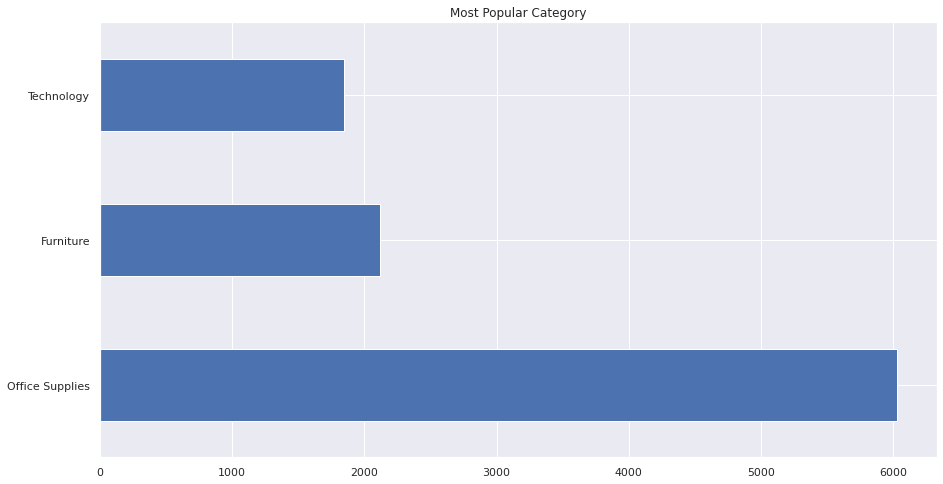

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})

df['Category'].value_counts().plot(kind='barh',title='Most Popular Category')

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

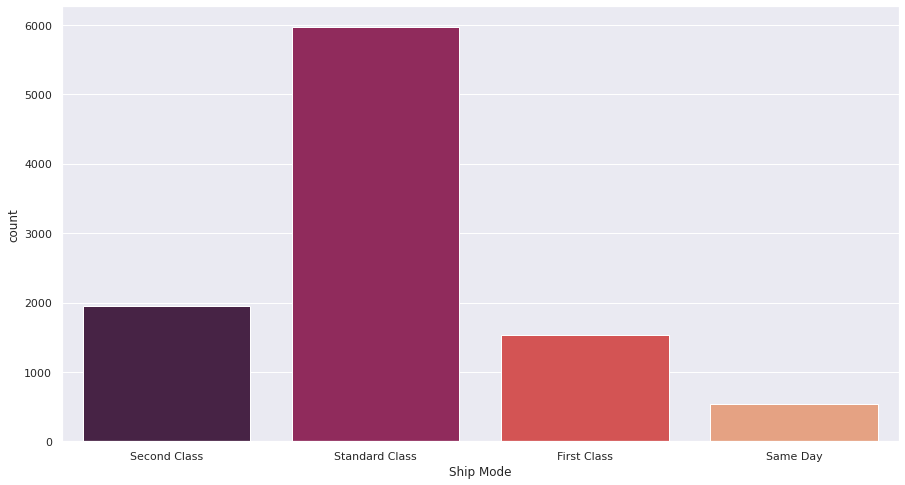

In [12]:
sns.countplot(x=df['Ship Mode'],palette='rocket')

## Profit Per Category 


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌Category<br>
Furniture           18451.2728 <br>
Office Supplies    122490.8008<br>
Technology         145454.9481<br>
<b> Technology Category is the first one however is also the category that have the less order </b><br>
</div>

<AxesSubplot:title={'center':'Category Profit'}, ylabel='Category'>

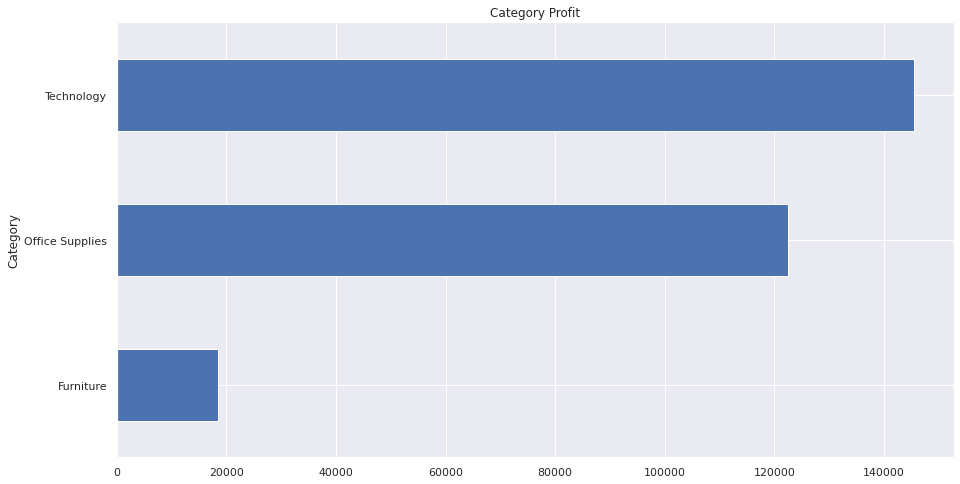

In [13]:
df.groupby('Category')['Profit'].sum().plot(kind='barh',title='Category Profit')

In [14]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

<AxesSubplot:title={'center':'Quantity that has been sold'}, ylabel='Category'>

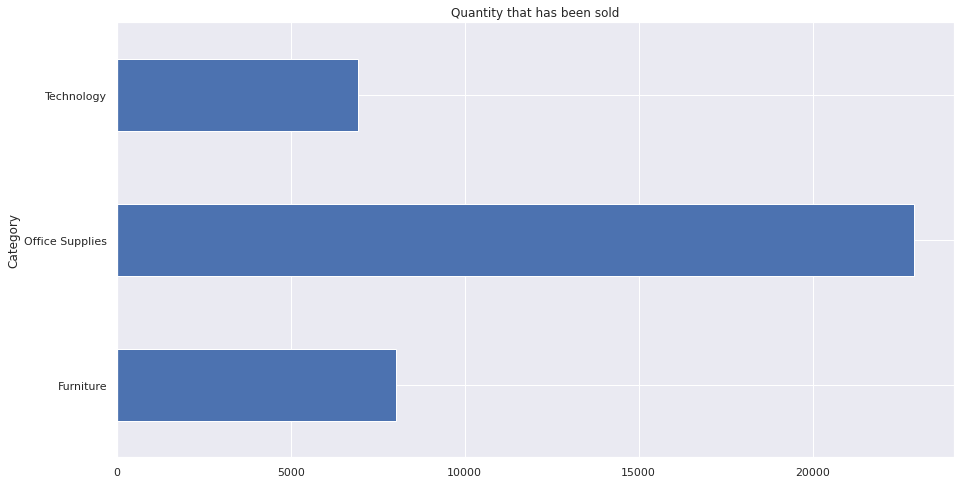

In [15]:
df.groupby('Category')['Quantity'].sum().plot(kind='barh',title='Quantity that has been sold')

<AxesSubplot:xlabel='Segment', ylabel='count'>

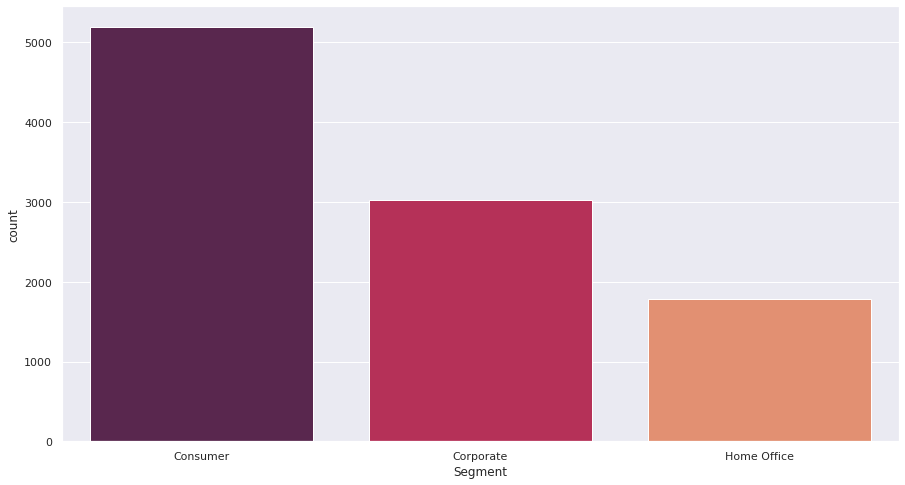

In [16]:
sns.countplot(x=df['Segment'],palette='rocket')

### Most Ordered Category Per Region 🗺
<b> Global Plot </b>

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 We can see that in each category the West is number one 
</div>

<AxesSubplot:title={'center':'Quantity that has been sold'}, ylabel='Region,Category'>

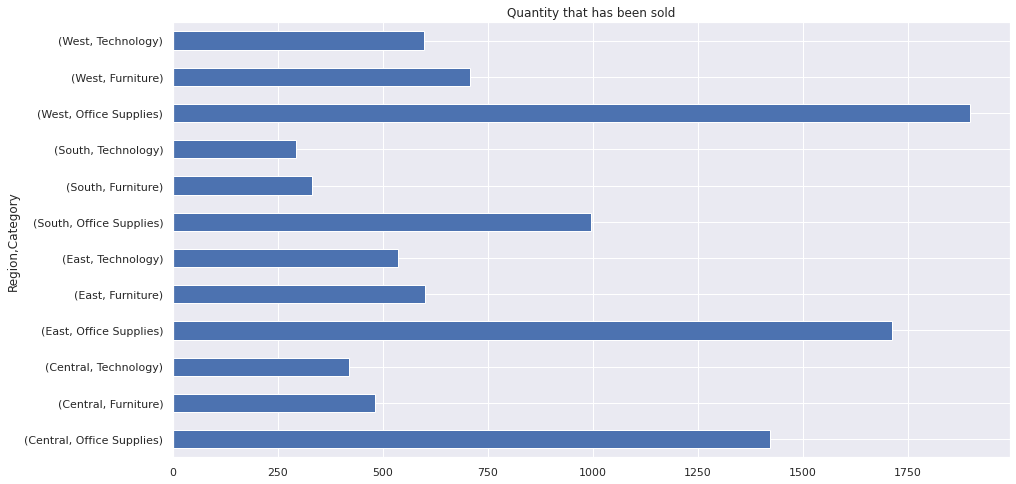

In [17]:
df.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')

### Repartition of the Profit per Region 💶

In [18]:
labels = df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values

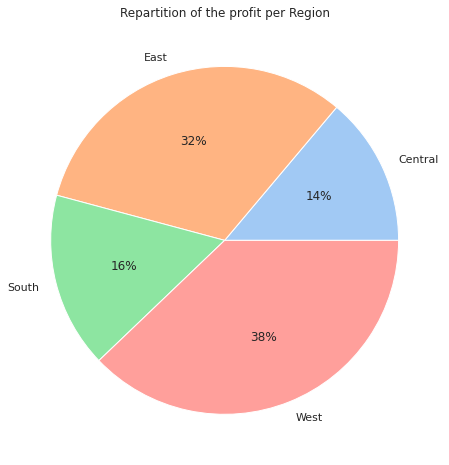

In [19]:
colors = sns.color_palette('pastel')[0:4]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the profit per Region")
plt.show()

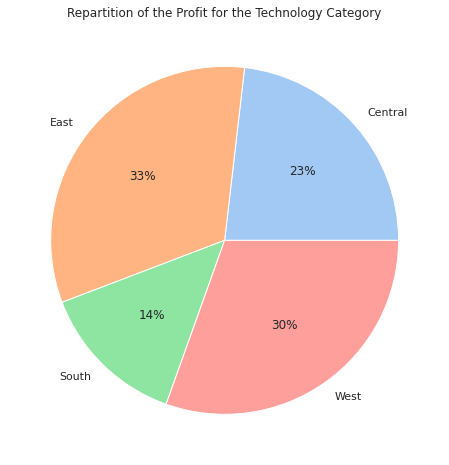

In [20]:
A = df[df['Category'] == 'Technology']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the Technology Category")
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 Even if the West order more technology product than the East, the East make more profit
</div>

# Version  ❶
<hr>

# Look into the Date ⏳

In [21]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [22]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [23]:
import math 

In [24]:
def category_date(category):
    category_1 = df[df['Category'] == category]
    
    order_date =  pd.to_datetime(category_1["Order Date"])
    ship_date =  pd.to_datetime(category_1["Ship Date"])

    order_date = list(map(to_integer, order_date))
    ship_date = list(map(to_integer, ship_date))

    difference = []
    for date1, date2 in zip(order_date, ship_date):
        difference.append(date2- date1)

    mean = sum(difference) // len(difference)
    maxi = max(difference)
    mini = min(difference)
    
    print("Mean of the Category {} {} ".format(category,mean))
    print("Maximum date of the Category {} {} ".format(category,maxi))
    print("Minimum date of the Category {} {} ".format(category,mini))
    print("\n")
    print("\n")
    
category_date('Technology')

category_date('Furniture')
category_date('Office Supplies')

Mean of the Category Technology 130 
Maximum date of the Category Technology 8876 
Minimum date of the Category Technology 0 




Mean of the Category Furniture 145 
Maximum date of the Category Furniture 8876 
Minimum date of the Category Furniture 0 




Mean of the Category Office Supplies 150 
Maximum date of the Category Office Supplies 8876 
Minimum date of the Category Office Supplies 0 




